# What3Words Password Generator

What3words (https://what3words.com) is site that either:

1. genereates a three word name for any point on the globe (I don't know how, yet)
2. genereates the latitiude, and longitude given a three word address

What3words has a Free tier API where you can sign up.

Using the API, I made a simple function to return decent passwords with  
a number and special character woven into the 3 word location by default.

## import modules

In [1]:
import random
import requests

# You may need to install `what3words` mod first.
# pip install what3words
import what3words

## create password function

In [3]:
def make_decent_password(numbers=True, symbol=True):

    api_key = '###' # Insert your key here

    geocoder = what3words.Geocoder("api_key")

    # latitude and longitude values are [-90 <= x <= 90]
    latitude = float(random.uniform(-90.0000,90.0000))
    longitude = float(random.uniform(-90.0000,90.0000))

    # Construct API request and collect words
    url = 'https://api.what3words.com/v3/convert-to-3wa?coordinates=%f,%f&language=en&key=%s' % (latitude, longitude, api_key)
    r = requests.get(url)
    r_content = r.json()
    words = r_content['words']

    # Generate number & character, if needed
    digits = ''
    character = ''
    if numbers == True:
        digits = str(random.randint(0,100))
    if symbol == True:
        character = random.choice(['+', '-', '*', '%', '@', '=', '?', '!'])
    a,b,c = words.split('.')
    
    password = a.capitalize() + digits + b.capitalize() + character + c.capitalize()
    return password

In [4]:
password = make_decent_password()

print(password)

Bandwidth32Retort%Agate


In [5]:
password = make_decent_password(numbers=False, symbol=True)

print(password)

PeckedKick-Director


In [6]:
password = make_decent_password(numbers=False, symbol=False)

print(password)

ScrapbookLamentationsSleepover


## Password entropy can be easily calculated:

**E = log2(R^L)**

- E represents the password entropy.

- R represents the number of possible characters within the password.

- L represents the total number of characters in your password.

Enhance entropy in two steps:

1. Add more character types. Include uppercase and lowercase letters, special characters, and numbers.

2. Increase the length. Longer passwords have higher scores than shorter versions.

In [56]:
def calc_entropy(caps = True, lower_case=True, numbers=True, symbol=True, total_length=10):
    
    import math
    possible_characters=0
    if caps==True:
        possible_characters=possible_characters+26
    if lower_case==True:
        possible_characters=possible_characters+26
    if symbol==True:
        possible_characters=possible_characters+8
    if numbers==True:
        possible_characters=possible_characters+10
 
    print('Total Possible Characters = ' + str(possible_characters))
    print('Entropy                   = ' + str(math.log2(possible_characters**total_length)))

## Entropy 

Some recommend that you should have:
1. Lower case letters
2. Caps
3. At least 8 symbols
4. Numbers
5. Password length >= 10

### This gives an entropy of greater than 60.

In [57]:
calc_entropy(caps = True, lower_case=True, numbers=True, symbol=True, total_length=10)

Total Possible Characters = 70
Entropy                   = 61.292830169449665


### Using: caps + lower case letters + numbers with a length of 10.

In [66]:
calc_entropy(caps = True, lower_case=True, numbers=True, symbol=False, total_length=10)

Total Possible Characters = 62
Entropy                   = 59.54196310386875


### Using: lower case letters, symbols with a length of 10.

In [59]:
calc_entropy(caps = True, lower_case=True, numbers=False, symbol=False, total_length=10)

Total Possible Characters = 34
Entropy                   = 50.87462841250339


### Using: ONLY lower case letters with a length of 10.

In [60]:
calc_entropy(caps = False, lower_case=True, numbers=False, symbol=False, total_length=10)

Total Possible Characters = 26
Entropy                   = 47.00439718141092


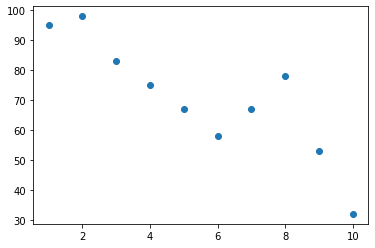

In [1]:
## I wouold like to plot some of these entropy values.
## Maybe I will draw a boundary on the entropy = 60 value and show which parameters give this level.

# import matplotlib
import matplotlib.pyplot as plt

#datasets
test = [1,2,3,4,5,6,7,8,9,10]
test2 = [95,98,83,75,67,58,67,78,53,32]
#scatter plot for the dataset
plt.scatter(test, test2)
plt.show()